In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
num_samples = 20
num_features = 32
rank = 3
gradient = np.linspace(0, 10, num_samples)
table = np.loadtxt('sim.txt')
table = table.astype(np.int)

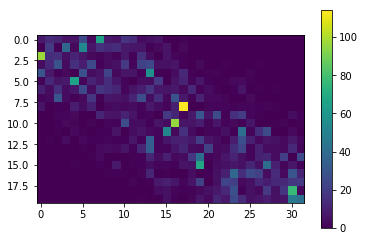

In [3]:
plt.imshow(table)
plt.colorbar()

In [4]:
from gneiss.cluster import rank_linkage
from gneiss.balances import balance_basis

x = pd.Series(np.arange(num_features))
x.index = x.index.astype(np.str)
tree = rank_linkage(x)
basis, _ = balance_basis(tree)

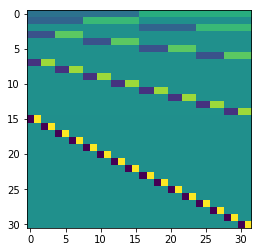

In [5]:
from skbio.stats.composition import clr
plt.imshow(clr(basis))

In [6]:
# only look at the first 3 partitions
psi = clr(basis)[:rank, :]

In [15]:
import pystan

#----------------------------------------------
# Create the Stan model
#  this is done by defining a string of Stan code.

fit_code = open('model.stan', 'r').read()

In [16]:
# perform the fit
fit_data = {'N': len(gradient), 'D': table.shape[1], 'r':rank, 
            'psi': np.linalg.pinv(psi).T, 'g': gradient, 'x': table}
fit = pystan.stan(model_code=fit_code, data=fit_data, iter=25000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c6049c1b19cbf8719e2e9afcd2630205 NOW.


In [19]:
traces = fit.extract()

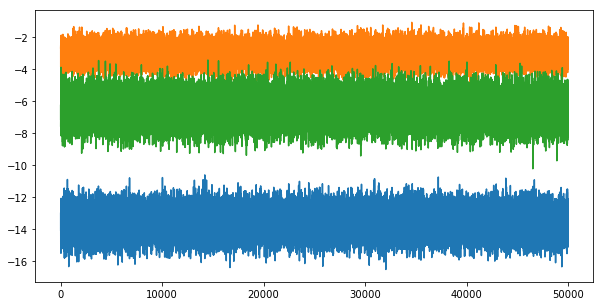

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(traces['beta0'])

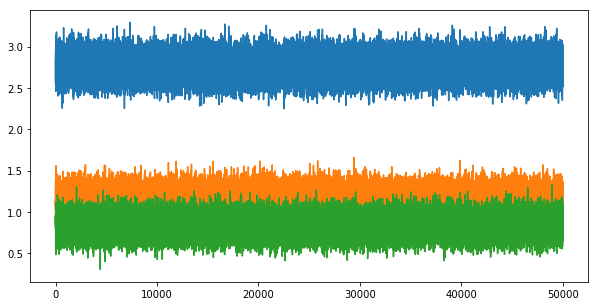

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(traces['beta1'])